## Applied Data Science Capstone

## _Introduction_

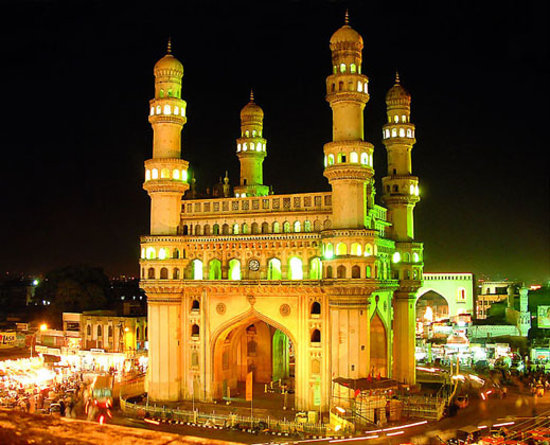

In [52]:
from IPython.display import Image
Image("hyd.jpg")

## History of Hyderabad

Hyderabad is the capital of the Indian state of Telangana. It is a historic city noted for its many monuments, temples, mosques and bazaars. A multitude of influences has shaped the character of the city in the last 400 years.

The city is forming its role and outlook as part of the booming service industry revolution, and is trying to preserve and popularize its history.

The History of this city, has deeply affected the culture, language, and cuisine of the people living here, and the areas once part of Hyderabad state.

Hyderabad is the capital of southern India's Telangana state. A major center for the technology industry, it's home to many upscale restaurants and shops. Its historic sites include Golconda Fort, a former diamond-trading center that was once the Qutb Shahi dynastic capital. The Charminar, a 16th-century mosque whose 4 arches support towering minarets, is an old city landmark near the long-standing Laad Bazaar.

## Importing Libraries

In [2]:
from bs4 import BeautifulSoup 
import requests 
import numpy as np

import pandas as pd 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import urllib
!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas datafram

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    orderedset-2.0             |           py36_0         231 KB  conda-forge
    geocoder-1.38.1            |             py_0          52 KB  conda-forge
    ratelim-0.1.6              |           py36_0           5 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         288 KB

The following NEW packages will be INSTALLED:

    geocoder:   1.38.1-py_0  conda-forge
    orderedset: 2.0-py36_0   conda-forge
    ratelim:    0.1.6-py36_0 conda-forge


orderedset-2.0       | 231 KB    | ##################################### | 100% 
geocoder-1.38.1      | 52 KB     | ##################################### | 100% 
ratelim-0.1.6      

## Data Section

In [3]:
url = "hyddata.csv"
df = pd.read_csv(url)
df.head()

,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
0,A.Gs Office S.O,500004,S.O,Non-Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Khairatabad,Hyderabad,TELANGANA,040-23428311,NaN,Hyderabad G.P.O.,NaN,NaN
1,A.Gs. Staff Quarters S.O,500045,S.O,Non-Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Khairatabad,Hyderabad,TELANGANA,040-23428373,NaN,Khairatabad H.O,NaN,NaN
2,Anandnagar S.O (Hyderabad),500004,S.O,Non-Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Khairatabad,Hyderabad,TELANGANA,040-23428326,NaN,Khairatabad H.O,NaN,NaN
3,AP Police Academy PO,500091,S.O,Non-Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Rajendra Nagar,Hyderabad,TELANGANA,NaN,NaN,Hyderabad G.P.O.,NaN,NaN
4,Appa Himayathsagar B.O,500008,B.O,Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Rajendranagar,K.V.Rangareddy,TELANGANA,NaN,Golconda S.O,Hyderabad G.P.O.,NaN,NaN


Focus is only on Hyderbad City

In [4]:
hyd_data = df.rename(columns={'divisionname' : 'Borough', 'officename' : 'Neighbourhood'})
hyd_data.head()

,Neighbourhood,pincode,officeType,Deliverystatus,Borough,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
0,A.Gs Office S.O,500004,S.O,Non-Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Khairatabad,Hyderabad,TELANGANA,040-23428311,NaN,Hyderabad G.P.O.,NaN,NaN
1,A.Gs. Staff Quarters S.O,500045,S.O,Non-Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Khairatabad,Hyderabad,TELANGANA,040-23428373,NaN,Khairatabad H.O,NaN,NaN
2,Anandnagar S.O (Hyderabad),500004,S.O,Non-Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Khairatabad,Hyderabad,TELANGANA,040-23428326,NaN,Khairatabad H.O,NaN,NaN
3,AP Police Academy PO,500091,S.O,Non-Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Rajendra Nagar,Hyderabad,TELANGANA,NaN,NaN,Hyderabad G.P.O.,NaN,NaN
4,Appa Himayathsagar B.O,500008,B.O,Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Rajendranagar,K.V.Rangareddy,TELANGANA,NaN,Golconda S.O,Hyderabad G.P.O.,NaN,NaN


Focus is only on Hyderbad City

In [5]:
hyd_data = hyd_data[hyd_data.Borough == "Hyderabad City"]
hyd_data.tail()

,Neighbourhood,pincode,officeType,Deliverystatus,Borough,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
72,Vidhan Sabha S.O (Hyderabad),500004,S.O,Non-Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Nampally,Hyderabad,TELANGANA,040-23428336,NaN,Hyderabad G.P.O.,NaN,NaN
73,Vijay Nagar Colony S.O (Hyderabad),500057,S.O,Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Asifnagar,Hyderabad,TELANGANA,040-23428352,NaN,Khairatabad H.O,NaN,NaN
74,Vivekananda Nagar Colony S.O,500018,S.O,Non-Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Balanagar,Hyderabad,TELANGANA,NaN,NaN,Khairatabad H.O,NaN,NaN
75,Wattinagulapalli B.O,500075,B.O,Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Rajendra Nagar,K.V.Rangareddy,TELANGANA,NaN,C.B.I.T S.O,Hyderabad G.P.O.,NaN,NaN
76,Yousufguda S.O,500045,S.O,Delivery,Hyderabad City,Hyderabad City,Andhra Pradesh,Khairatabad,Hyderabad,TELANGANA,040-23428338,NaN,Khairatabad H.O,NaN,NaN


Join all by Pincode

In [6]:
def neighbourhood_list(grouped):
    return ', '.join(sorted(grouped['Neighbourhood'].tolist()))

grp = hyd_data.groupby(['pincode', 'Borough'])
hydcity_hyd_city = grp.apply(neighbourhood_list).reset_index(name = 'Neighbourhood')

Displaying hyderabadcity data

In [7]:
hydcity_hyd_city.head()

,pincode,Borough,Neighbourhood
0,500001,Hyderabad City,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O..."
1,500004,Hyderabad City,"A.Gs Office S.O, Anandnagar S.O (Hyderabad), B..."
2,500006,Hyderabad City,"Karwan Sahu S.O, Kulsumpura S.O, Mangalhat S.O"
3,500008,Hyderabad City,"Appa Himayathsagar B.O, Dargah Hussain Shahwal..."
4,500018,Hyderabad City,"Bharat Nagar Colony S.O, Erragadda S.O, Fathen..."


Getting Coordinates as per pincode

In [8]:
def get_latlng(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Hyderabad, TELANGANA'.format(postal_code))
        lat_lng_coords = g.latlng
    return lat_lng_coords

print('done')

done


In [9]:
get_latlng('500001')

[17.390585000000044, 78.47038817100008]

Now appling this functions for all pincode of areas of South Mumbai

In [10]:
latitude = []
longitude = []

for row in hydcity_hyd_city['pincode']:
    coordinate = get_latlng(row)
    latitude.append(coordinate[0])
    longitude.append(coordinate[1])
    
hydcity_hyd_city['latitude'] = latitude
hydcity_hyd_city['longitude'] = longitude
hydcity_hyd_city.head()

,pincode,Borough,Neighbourhood,latitude,longitude
0,500001,Hyderabad City,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",17.390585,78.470388
1,500004,Hyderabad City,"A.Gs Office S.O, Anandnagar S.O (Hyderabad), B...",17.403781,78.462525
2,500006,Hyderabad City,"Karwan Sahu S.O, Kulsumpura S.O, Mangalhat S.O",17.371224,78.454180
3,500008,Hyderabad City,"Appa Himayathsagar B.O, Dargah Hussain Shahwal...",17.396335,78.406792
4,500018,Hyderabad City,"Bharat Nagar Colony S.O, Erragadda S.O, Fathen...",17.457435,78.445780


Next, we are going to start utilizing the Foursquare API to explore the South Mumbabi for data collection

In [11]:
CLIENT_ID = 'Q5U3IIIC5I51HWBVM3D1S5IG0GNAIPRLPE4R2CKMJGS2NBMD' # your Foursquare ID
CLIENT_SECRET = 'AONPJJBL5CACYQBOHBA3JKVMSSYFEA41VBSXAZHMKPXRX5ST' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q5U3IIIC5I51HWBVM3D1S5IG0GNAIPRLPE4R2CKMJGS2NBMD
CLIENT_SECRET:AONPJJBL5CACYQBOHBA3JKVMSSYFEA41VBSXAZHMKPXRX5ST


In [12]:
first_lat = hydcity_hyd_city['latitude'][0]
first_long = hydcity_hyd_city['longitude'][0]
radius = 500
LIMIT = 100

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    first_lat, 
    first_long, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=Q5U3IIIC5I51HWBVM3D1S5IG0GNAIPRLPE4R2CKMJGS2NBMD&client_secret=AONPJJBL5CACYQBOHBA3JKVMSSYFEA41VBSXAZHMKPXRX5ST&v=20180605&ll=17.390585000000044,78.47038817100008&radius=500&limit=100'

Getting the results

In [13]:
results = requests.get(url).json()

In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We are ready to clean the json and structure it into *pandas* data frame

In [15]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Jagdish Market,Mobile Phone Shop,17.391815,78.474880
1,Al-Yousufain Fast Food Center,Fried Chicken Joint,17.391338,78.470147
2,Hotel Royalton,Hotel,17.393211,78.473504
3,Hyderabad Deccan Railway Station,Platform,17.392863,78.467555
4,Hollywood Foot Wear,Shoe Store,17.391627,78.474748


In [16]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

7 venues were returned by Foursquare.


## Methodlogy Selection

Creating a Map

In [17]:
address = 'Hyderabad, TELANGANA'

geolocator = Nominatim(user_agent="userid")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of South Mumbai using latitude and longitude values
map_hydcity_hyd_city = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# add markers to map
for lat, lng, borough, neighborhood in zip(hydcity_hyd_city['latitude'],hydcity_hyd_city['longitude'],
hydcity_hyd_city['Borough'], hydcity_hyd_city['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill = True,
        fill_color='#cc3139',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hydcity_hyd_city)
    

map_hydcity_hyd_city

## Explore Hyderabad City

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighboruhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
hydcity_venues = getNearbyVenues(names=hydcity_hyd_city['Neighbourhood'],
                                   latitudes=hydcity_hyd_city['latitude'],
                                   longitudes=hydcity_hyd_city['longitude']
                                  )

Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O, Seetharampet S.O, State Bank Of Hyderabad S.O
A.Gs Office S.O, Anandnagar S.O (Hyderabad), Bazarghat S.O (Hyderabad), Khairatabad H.O, Parishram Bhawan S.O, Vidhan Sabha S.O (Hyderabad)
Karwan Sahu S.O, Kulsumpura S.O, Mangalhat S.O
Appa Himayathsagar B.O, Dargah Hussain Shahwali B.O, Golconda S.O, Hyder Shah Kote B.O, Kakatiya Nagar S.O, Lunger House S.O, Nanakramguda B.O, Sakkubai Nagar S.O, Toli Chowki S.O
Bharat Nagar Colony S.O, Erragadda S.O, Fathenagar Colony S.O, Moosapet B.O, Sanath Nagar Colony S.O, Sanathnagar I E S.O, Swarajyanagar S.O, Vivekananda Nagar Colony S.O
Lingampalli S.O
Central Secretariat S.O
Humayunnagar S.O, Murad Nagar S.O (Hyderabad), Shantinagar S.O (Hyderabad)
Gagan Mahal S.O, Himayathnagar S.O, Narayanguda S.O, Ramakrishna Mutt S.O
Ibrahim Bagh Lines S.O
Gachibowli S.O, Manuu S.O
Dr.B R Ambedkar O.U  S.O, Jubilee Hills S.O
Banjara Hills S.O
Sanjeev Reddy Nagar S.O, Vengal Rao Nagar S.O
Raj Bhawan S.O (Hydera

'Top 5 regions of Hyderabad City with Highest Number of Restaurants'

In [21]:
print(hydcity_venues.shape)
hydcity_venues.head()

(243, 7)


,Neighbourhood,Neighbourhood Latitude,Neighboruhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",17.390585,78.470388,Jagdish Market,17.391815,78.474880,Mobile Phone Shop
1,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",17.390585,78.470388,Al-Yousufain Fast Food Center,17.391338,78.470147,Fried Chicken Joint
2,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",17.390585,78.470388,Hotel Royalton,17.393211,78.473504,Hotel
3,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",17.390585,78.470388,Hyderabad Deccan Railway Station,17.392863,78.467555,Platform
4,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",17.390585,78.470388,Hollywood Foot Wear,17.391627,78.474748,Shoe Store


In [22]:
hydcity_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighboruhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"A.Gs Office S.O, Anandnagar S.O (Hyderabad), Bazarghat S.O (Hyderabad), Khairatabad H.O, Parishram Bhawan S.O, Vidhan Sabha S.O (Hyderabad)",15,15,15,15,15,15
"A.Gs. Staff Quarters S.O, Yousufguda S.O",2,2,2,2,2,2
"Appa Himayathsagar B.O, Dargah Hussain Shahwali B.O, Golconda S.O, Hyder Shah Kote B.O, Kakatiya Nagar S.O, Lunger House S.O, Nanakramguda B.O, Sakkubai Nagar S.O, Toli Chowki S.O",6,6,6,6,6,6
"Aziz Nagar B.O, Bhaskar Nagar S.O, C.B.I.T S.O, Gandipet B.O, Himayathnagar B.O, Janwada B.O, Kokapet B.O, Mancherevula B.O, Narsingi B.O, Wattinagulapalli B.O",16,16,16,16,16,16
Banjara Hills S.O,9,9,9,9,9,9
"Bharat Nagar Colony S.O, Erragadda S.O, Fathenagar Colony S.O, Moosapet B.O, Sanath Nagar Colony S.O, Sanathnagar I E S.O, Swarajyanagar S.O, Vivekananda Nagar Colony S.O",4,4,4,4,4,4
CUC S.O,2,2,2,2,2,2
Central Secretariat S.O,2,2,2,2,2,2
"Cyberabad S.O, Madhapur B.O",36,36,36,36,36,36


Let's find out how many unique categories can be curated from all the returned venues

In [23]:
print('There are {} uniques categories.'.format(len(hydcity_venues['Venue Category'].unique())))

There are 83 uniques categories.


## Analyze Each Neighborhood

In [24]:
# one hot encoding
hydcity_onehot = pd.get_dummies(hydcity_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hydcity_onehot['Neighbourhood'] = hydcity_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [hydcity_onehot.columns[-1]] + list(hydcity_onehot.columns[:-1])
hydcity_onehot = hydcity_onehot[fixed_columns]

hydcity_onehot.head()

,Neighbourhood,ATM,Andhra Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Beer Garden,Boutique,Breakfast Spot,Burger Joint,Bus Station,Cafeteria,Café,Chaat Place,Chinese Restaurant,Clothing Store,Coffee Shop,College Rec Center,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Food Court,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gift Shop,Golf Course,Grocery Store,Gym,Historic Site,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Jewelry Store,Juice Bar,Lake,Lounge,Mediterranean Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Multiplex,Nightclub,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pie Shop,Pizza Place,Platform,Plaza,Rajasthani Restaurant,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Sports Bar,Tea Room,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [25]:
hydcity_onehot.shape

(243, 84)

## Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [26]:
hydcity_grouped = hydcity_onehot.groupby('Neighbourhood').mean().reset_index()
hydcity_grouped

,Neighbourhood,ATM,Andhra Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Beer Garden,Boutique,Breakfast Spot,Burger Joint,Bus Station,Cafeteria,Café,Chaat Place,Chinese Restaurant,Clothing Store,Coffee Shop,College Rec Center,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Food Court,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gift Shop,Golf Course,Grocery Store,Gym,Historic Site,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Jewelry Store,Juice Bar,Lake,Lounge,Mediterranean Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Multiplex,Nightclub,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pie Shop,Pizza Place,Platform,Plaza,Rajasthani Restaurant,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Sports Bar,Tea Room,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,"A.Gs Office S.O, Anandnagar S.O (Hyderabad), B...",0.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.066667,0.000000,0.000000,0.000000,0.066667,0.000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.133333,0.0000,0.0000,0.133333,0.066667,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.066667,0.000000,0.000000,0.0000,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.066667,0.0000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000
1,"A.Gs. Staff Quarters S.O, Yousufguda S.O",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.500000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.500000,0.000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Appa Himayathsagar B.O, Dargah Hussain Shahwal...",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.166667,0.00,0.000,0.166667,0.000000,0.00,0.000000,0.0000,0.0000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
3,"Aziz Nagar B.O, Bhaskar Nagar S.O, C.B.I.T S.O...",0.0,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0625,0.062500,0.000000,0.000000,0.000000,0.125000,0.000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.187500,0.0625,0.0625,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.062500,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.062500,0.062500,0.000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0625

## Let's confirm the new size

In [28]:
hydcity_grouped.shape

(26, 84)

## Let's print each neighborhood along with the top 5 most common venues

In [29]:
num_top_venues = 5

for hood in hydcity_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = hydcity_grouped[hydcity_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A.Gs Office S.O, Anandnagar S.O (Hyderabad), Bazarghat S.O (Hyderabad), Khairatabad H.O, Parishram Bhawan S.O, Vidhan Sabha S.O (Hyderabad)----
                           venue  freq
0              Indian Restaurant  0.13
1                          Hotel  0.13
2          Hyderabadi Restaurant  0.13
3          Performing Arts Venue  0.07
4  Paper / Office Supplies Store  0.07


----A.Gs. Staff Quarters S.O, Yousufguda S.O----
                       venue  freq
0       Fast Food Restaurant   0.5
1             Sandwich Place   0.5
2                        ATM   0.0
3  Middle Eastern Restaurant   0.0
4      Performing Arts Venue   0.0


----Appa Himayathsagar B.O, Dargah Hussain Shahwali B.O, Golconda S.O, Hyder Shah Kote B.O, Kakatiya Nagar S.O, Lunger House S.O, Nanakramguda B.O, Sakkubai Nagar S.O, Toli Chowki S.O----
               venue  freq
0      Women's Store  0.17
1               Café  0.17
2      Historic Site  0.17
3        Golf Course  0.17
4  Indian Restaurant  0.17


---

## Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = hydcity_grouped['Neighbourhood']

for ind in np.arange(hydcity_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hydcity_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"A.Gs Office S.O, Anandnagar S.O (Hyderabad), B...",Hyderabadi Restaurant,Hotel,Indian Restaurant,Ice Cream Shop,Café,Paper / Office Supplies Store,Middle Eastern Restaurant,Performing Arts Venue,South Indian Restaurant,Bakery
1,"A.Gs. Staff Quarters S.O, Yousufguda S.O",Fast Food Restaurant,Sandwich Place,Women's Store,Furniture / Home Store,Donut Shop,Electronics Store,Farmers Market,Food,Food Court,Fried Chicken Joint
2,"Appa Himayathsagar B.O, Dargah Hussain Shahwal...",Women's Store,Café,Hyderabadi Restaurant,Indian Restaurant,Historic Site,Golf Course,Electronics Store,Farmers Market,Fast Food Restaurant,Food
3,"Aziz Nagar B.O, Bhaskar Nagar S.O, C.B.I.T S.O...",Hotel,Coffee Shop,Hotel Pool,Indian Restaurant,Restaurant,Sandwich Place,Cafeteria,Lounge,South Indian Restaurant,Spa
4,Banjara Hills S.O,Coffee Shop,Deli / Bodega,Café,Hookah Bar,Bakery,Sandwich Place,Electronics Store,Farmers Market,Fast Food Restaurant,Food
5,"Bharat Nagar Colony S.O, Erragadda S.O, Fathen...",Train Station,Bus Station,Department Store,Women's Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Food Court
6,CUC S.O,ATM,Pizza Place,Hot Dog Joint,Fried Chicken Joint,Dessert Shop,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food
7,Central Secretariat S.O,Garden,Chinese Restaurant,Furniture / Home Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Food Court,Fried Chicken Joint
8,"Cyberabad S.O, Madhapur B.O",Café,Coffee Shop,Indian Restaurant,Hotel,Bakery,Mediterranean Restaurant,Jewelry Store,Pizza Place,Lounge,Snack Place
9,"Dr.B R Ambedkar O.U S.O, Jubilee Hills S.O",Women's Store,Food Court,Park,Lake,Gym,Historic Site,Donut Shop,Hookah Bar,Electronics Store,Farmers Market


## Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [35]:
# set number of clusters
kclusters = 5

hydcity_grouped_clustering = hydcity_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hydcity_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 3, 3, 1, 3, 3, 4, 3, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [37]:
hydcity_merged = hydcity_hyd_city

# add clustering labels 
hydcity_merged['Cluster Labels'] = kmeans.labels_[1]

hydcity_merged = hydcity_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

hydcity_merged.head() # check the last columns!

,pincode,Borough,Neighbourhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,500001,Hyderabad City,"Gandhi Bhawan S.O (Hyderabad), Moazzampura S.O...",17.390585,78.470388,0,Hotel,Shoe Store,Train Station,Electronics Store,Platform,Mobile Phone Shop,Fried Chicken Joint,Donut Shop,Farmers Market,Fast Food Restaurant
1,500004,Hyderabad City,"A.Gs Office S.O, Anandnagar S.O (Hyderabad), B...",17.403781,78.462525,0,Hyderabadi Restaurant,Hotel,Indian Restaurant,Ice Cream Shop,Café,Paper / Office Supplies Store,Middle Eastern Restaurant,Performing Arts Venue,South Indian Restaurant,Bakery
2,500006,Hyderabad City,"Karwan Sahu S.O, Kulsumpura S.O, Mangalhat S.O",17.371224,78.454180,0,Women's Store,South Indian Restaurant,Garden,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Food Court,Fried Chicken Joint
3,500008,Hyderabad City,"Appa Himayathsagar B.O, Dargah Hussain Shahwal...",17.396335,78.406792,0,Women's Store,Café,Hyderabadi Restaurant,Indian Restaurant,Historic Site,Golf Course,Electronics Store,Farmers Market,Fast Food Restaurant,Food
4,500018,Hyderabad City,"Bharat Nagar Colony S.O, Erragadda S.O, Fathen...",17.457435,78.445780,0,Train Station,Bus Station,Department Store,Women's Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Food Court


Finally, let's visualize the resulting clusters

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hydcity_merged['latitude'], hydcity_merged['longitude'], hydcity_merged['Neighbourhood'], hydcity_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

## Cluster 1

In [43]:
hydcity_merged.loc[hydcity_merged['Cluster Labels'] == 0, hydcity_merged.columns[[1] + list(range(5, hydcity_merged.shape[1]))]].head( )

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hyderabad City,0,Hotel,Shoe Store,Train Station,Electronics Store,Platform,Mobile Phone Shop,Fried Chicken Joint,Donut Shop,Farmers Market,Fast Food Restaurant
1,Hyderabad City,0,Hyderabadi Restaurant,Hotel,Indian Restaurant,Ice Cream Shop,Café,Paper / Office Supplies Store,Middle Eastern Restaurant,Performing Arts Venue,South Indian Restaurant,Bakery
2,Hyderabad City,0,Women's Store,South Indian Restaurant,Garden,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Food Court,Fried Chicken Joint
3,Hyderabad City,0,Women's Store,Café,Hyderabadi Restaurant,Indian Restaurant,Historic Site,Golf Course,Electronics Store,Farmers Market,Fast Food Restaurant,Food
4,Hyderabad City,0,Train Station,Bus Station,Department Store,Women's Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food,Food Court


## Conclusion

In majority of part of Hyderabad City "Women's Store" & "Food Court" is the most popular type of service.